## 주제2_C3조.ipynb

## <span style="background-color: yellow;">【 주제 선정 】</span>
## <span style="color:blue;">**2. <u>VIP 고객군</u>은 일요일, 월요일에 주문량이 늘어날 것이다.**</span>


In [111]:
import numpy
import pandas
import warnings
warnings.filterwarnings('ignore')

print("NumPy version:", numpy.__version__)
print("Pandas version:", pandas.__version__)


NumPy version: 1.26.4
Pandas version: 2.2.2


In [112]:
# 기본 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [113]:
# Pandas 옵션 설정 (모든 컬럼 출력)
pd.set_option('display.max_columns', None)

In [114]:
# 1. 한글 폰트 설치 (Google Colab 전용)
!apt-get update -qq
!apt-get install -qq -y fonts-nanum

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

import warnings
warnings.filterwarnings('ignore')

# 2. matplotlib에서 한글 폰트 설정
def set_korean_font():
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 폰트 경로 설정
    if os.path.exists(font_path):
        fm.fontManager.addfont(font_path)  # 폰트 매니저에 추가
        plt.rc('font', family='NanumGothic')  # 기본 폰트 설정
    else:
        print("한글 폰트 경로를 찾을 수 없습니다.")

# 3. 폰트 적용 및 캐시 리셋 (중요)
set_korean_font()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
fm._load_fontmanager(try_read_cache=False)  # 폰트 매니저 캐시 리셋


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
from google.colab import drive
drive.mount('/content/drive')

# 데이터 로드 (파일 경로)
aisles_df = pd.read_csv('/content/drive/MyDrive/data/aisles.csv')
departments_df = pd.read_csv('/content/drive/MyDrive/data/departments.csv')
orders_df = pd.read_csv('/content/drive/MyDrive/data/orders.csv')
order_products_prior_df = pd.read_csv('/content/drive/MyDrive/data/order_products__prior.csv')
order_products_train_df = pd.read_csv('/content/drive/MyDrive/data/order_products__train.csv')
products_df = pd.read_csv('/content/drive/MyDrive/data/products.csv')


In [117]:
# 모든 컬럼이 출력
pd.set_option('display.max_columns', None)

dataframes = {
    "aisles_df": aisles_df,
    "departments_df": departments_df,
    "orders_df": orders_df,
    "order_products_prior_df": order_products_prior_df,
    "order_products_train_df": order_products_train_df,
    "products_df": products_df
}
i = 0
for name, df in dataframes.items():
    i += 1
    print("=" * 50)
    print(f" [{i}] {name}")  # 데이터프레임 이름 출력
    print("=" * 50)

    # 데이터프레임 정보 출력
    info_df = pd.DataFrame({
        "Columns": df.columns,
        "Non-Null Count": [df[col].count() for col in df.columns],
        "Dtype": [df[col].dtype for col in df.columns]
    })
    print("\n데이터셋 정보")
    display(info_df)  # 테이블 형태로 출력

    # 데이터프레임 전체 출력
    print(f"\n{name} 데이터셋 (총 {df.shape[0]} 행 × {df.shape[1]} 열)")
    display(df)  # 테이블 형태로 출력

 [1] aisles_df

데이터셋 정보


,Columns,Non-Null Count,Dtype
0,aisle_id,134,int64
1,aisle,134,object



aisles_df 데이터셋 (총 134 행 × 2 열)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


 [2] departments_df

데이터셋 정보


,Columns,Non-Null Count,Dtype
0,department_id,21,int64
1,department,21,object



departments_df 데이터셋 (총 21 행 × 2 열)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


 [3] orders_df

데이터셋 정보


,Columns,Non-Null Count,Dtype
0,order_id,3164696,int64
1,user_id,3164696,int64
2,eval_set,3164696,object
3,order_number,3164696,int64
4,order_dow,3164696,int64
5,order_hour_of_day,3164696,int64
6,days_since_prior_order,2973873,float64



orders_df 데이터셋 (총 3164696 행 × 7 열)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3164691,1061116,190823,prior,1,2,16,NaN
3164692,365819,190823,prior,2,5,11,17.0
3164693,3035683,190823,prior,3,2,10,30.0
3164694,917522,190823,prior,4,0,17,30.0


 [4] order_products_prior_df

데이터셋 정보


,Columns,Non-Null Count,Dtype
0,order_id,5202936,int64
1,product_id,5202936,int64
2,add_to_cart_order,5202935,float64
3,reordered,5202935,float64



order_products_prior_df 데이터셋 (총 5202936 행 × 4 열)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1.0,1.0
1,2,28985,2.0,1.0
2,2,9327,3.0,0.0
3,2,45918,4.0,1.0
4,2,30035,5.0,0.0
...,...,...,...,...
5202931,549061,1025,16.0,0.0
5202932,549061,45007,17.0,0.0
5202933,549061,39732,18.0,0.0
5202934,549061,5077,19.0,0.0


 [5] order_products_train_df

데이터셋 정보


,Columns,Non-Null Count,Dtype
0,order_id,1384617,int64
1,product_id,1384617,int64
2,add_to_cart_order,1384617,int64
3,reordered,1384617,int64



order_products_train_df 데이터셋 (총 1384617 행 × 4 열)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


 [6] products_df

데이터셋 정보


,Columns,Non-Null Count,Dtype
0,product_id,49688,int64
1,product_name,49688,object
2,aisle_id,49688,int64
3,department_id,49688,int64



products_df 데이터셋 (총 49688 행 × 4 열)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


### &nbsp; <span style="color:red;">◆ 결측치 처리 방법</span>
- 결측치 제거 : 첫 주문 일부 사용자의 정보 손실가능
- 평균값으로 대체 : 평균이 오른쪽으로 꼬리가 길어 평균이 비정상 확률높다
- 중앙값으로 대체 : 중앙값이 7일이라 대체값으로 가능성 있다.<br>

 &nbsp;<span style="color:blue;">**첫주문인 경우 : &nbsp;-1 &nbsp; → &nbsp; 이전에 주문이 없다는 뜻으로 -1로 대체**</span>

In [119]:
# 결측치를 -1로 대체 하여 (이전 주문이 없다 = 첫 주문이라는 뜻)
orders_df["days_since_prior_order"] = orders_df["days_since_prior_order"].fillna(-1)

# 첫 주문 여부를 나타내는 새로운 컬럼 추가
orders_df["first_order"] = (orders_df["days_since_prior_order"] == -1).astype(int)

orders_df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_order
0,2539329,1,prior,1,2,8,-1.0,1
1,2398795,1,prior,2,3,7,15.0,0
2,473747,1,prior,3,3,12,21.0,0
3,2254736,1,prior,4,4,7,29.0,0
4,431534,1,prior,5,4,15,28.0,0
...,...,...,...,...,...,...,...,...
3164691,1061116,190823,prior,1,2,16,-1.0,1
3164692,365819,190823,prior,2,5,11,17.0,0
3164693,3035683,190823,prior,3,2,10,30.0,0
3164694,917522,190823,prior,4,0,17,30.0,0


1. 고객 세그먼트 정의 (RF 기반)<br>
  • **Recency (R)** &nbsp; &nbsp;: 마지막 주문과의 차이 (최소값)<br>
  • **Frequency (F)** : 총 주문 횟수 (최대 주문 번호)<br>
  • **Cartegory (C)** &nbsp;: 다양한 제품 카테고리에서의 구매 여부(최대 카테고리 수)<br>
  • **user_id 단위**로 데이터를 **그룹화(GroupBy)**하여 고객별 Recency, Frequency를 계산

## <span style="background-color: yellow;">【 데이터 내용 파악 】</span>

<span style="color:red;">**주문 데이터 (orders.csv) 분석**</span>

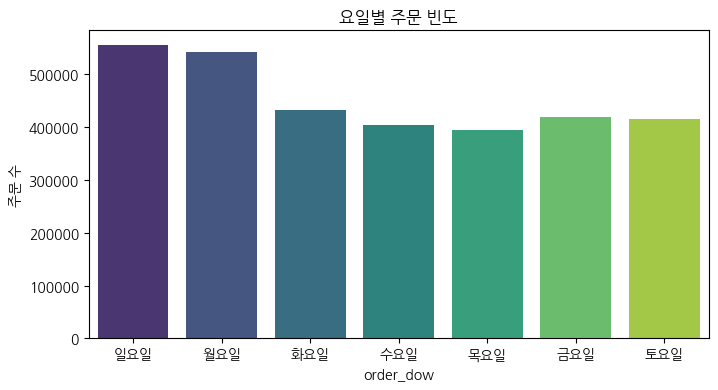

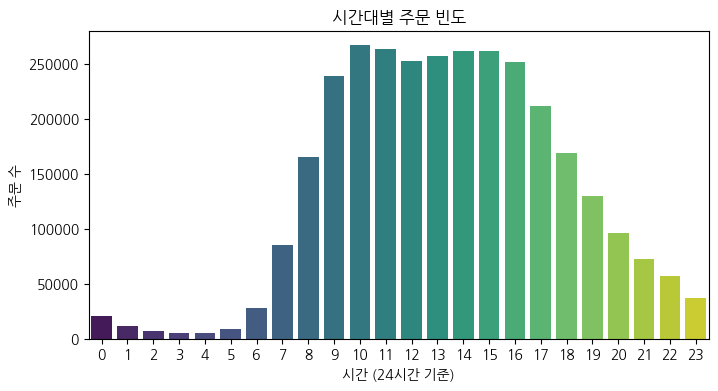

In [131]:
# 주문 요일 및 시간 분포
plt.figure(figsize=(8,4))
sns.countplot(data=orders_df, x='order_dow', palette="viridis")
plt.title("요일별 주문 빈도")
#plt.xlabel("요일 (0=일요일, 6=토요일)")
ticks=[0, 1, 2, 3, 4, 5, 6]
labels=['일요일', '월요일', '화요일', '수요일', '목요일', '금요일', '토요일']
plt.xticks(ticks=ticks, labels=labels)
plt.ylabel("주문 수")

# 여백 조정
#plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(data=orders_df, x='order_hour_of_day', palette="viridis")
plt.title("시간대별 주문 빈도")
plt.xlabel("시간 (24시간 기준)")
plt.ylabel("주문 수")
plt.show();

---
<span style="color:red;">**제품 데이터 분석 (products.csv, aisles.csv, departments.csv)**</span>

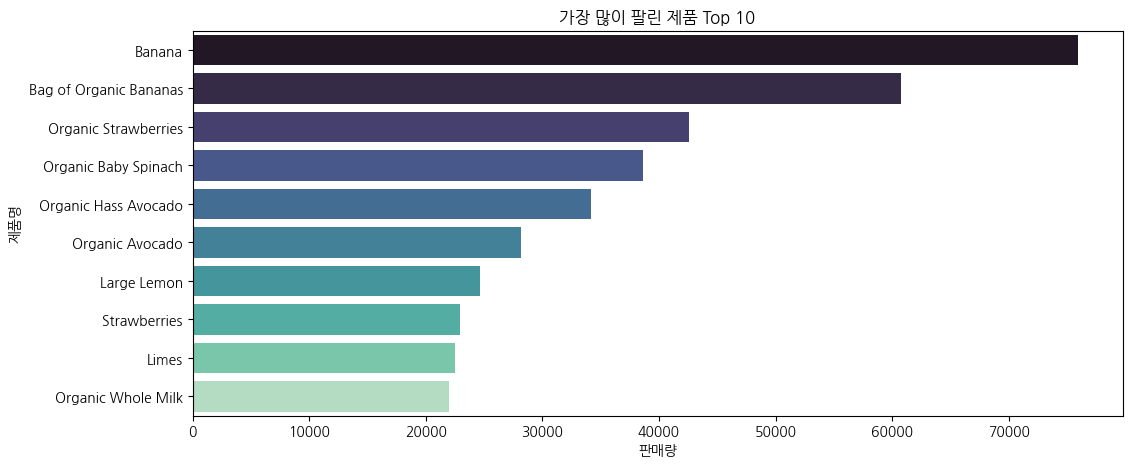

In [132]:
# 제품 정보 병합
products_df = products_df.merge(aisles_df, on="aisle_id", how="left")
products_df = products_df.merge(departments_df, on="department_id", how="left")

# 가장 많이 팔린 제품 확인
top_products = order_products_prior_df['product_id'].value_counts().head(10)
top_products = top_products.reset_index()
top_products.columns = ['product_id', 'count']
top_products = top_products.merge(products_df, on="product_id", how="left")

plt.figure(figsize=(12,5))
sns.barplot(data=top_products, y='product_name', x='count', palette="mako")
plt.title("가장 많이 팔린 제품 Top 10")
plt.xlabel("판매량")
plt.ylabel("제품명")
plt.show();

In [135]:
ord = orders_df.copy()
ord.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_order
0,2539329,1,prior,1,2,8,-1.0,1
1,2398795,1,prior,2,3,7,15.0,0
2,473747,1,prior,3,3,12,21.0,0
3,2254736,1,prior,4,4,7,29.0,0
4,431534,1,prior,5,4,15,28.0,0



-----------------------------
 	 median :  7.0
-----------------------------



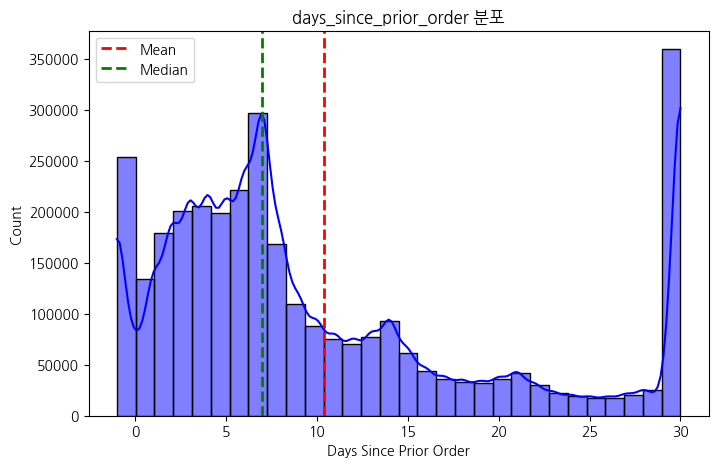

In [139]:
import warnings
warnings.filterwarnings('ignore')

# 데이터 분포 분석
print("\n-----------------------------")
print(" \t median : ", orders_df["days_since_prior_order"].median())
print("-----------------------------\n")
plt.figure(figsize=(8, 5))
sns.histplot(orders_df["days_since_prior_order"].dropna(), bins=30, kde=True, color='blue')
plt.axvline(orders_df["days_since_prior_order"].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(orders_df["days_since_prior_order"].median(), color='green', linestyle='dashed', linewidth=2, label="Median")
plt.title("days_since_prior_order 분포")
plt.xlabel("Days Since Prior Order")
plt.ylabel("Count")
plt.legend()
plt.show();

- 대부분이 7일 이내에 집중된 많은 사용자가 매주 반복주문 경향<br>
- 평균선이 중앙값보다 오른쪽에 위치 오른쪽 꼬리가 긴분포(대부분 7일이내 주문)
- 30일지점에서 주문량급증(특정 월간 구매 패턴 사용자 존재)

---
### &nbsp; &nbsp;◆ 결론

- "Train 데이터셋은 전체 주문 내역(prior 데이터셋)의 대표성을 어느 정도 보유
- 재주문(reordered) 예측과 같은 모델링 작업에 활용하기에 적합하나,
- 주문 시 아이템 담기 순서(add_to_cart_order)의 범위 차이와 같이 두 데이터셋 간 일부 변수에서 차이가 있어,
- 해당 변수의 특성을 면밀히 분석하고 추가적인 전처리 또는 feature engineering을 고려해야 함.

---
## **【 VIP 고객 군집 선정 】**
- 가장 높은 Frequency & 낮은 Recency (재구매율 높은 고객)

## <span style="color:blue;">**① VIP(충성고객) 정의 및 선정 :**</span>
- 사용자 활동 데이터를 바탕으로 충성고객을 선정<br>
  1. <span style="color:red;">**최근 활동:**</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 최근 주문 여부와 빈도 → Recency (R)
  2. <span style="color:red;">**주문 빈도:**</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 정기적인 구매를 하는지 여부  →  Frequency (F)
  3. <span style="color:red;">**카테고리 다양성:**</span> &nbsp; 다양한 제품 카테고리에서 구매하는지 여부<br><br>
  
- 각 기준의 임계값은 특정 비즈니스 상황에 맞게 조정

- **필요 컬럼**
>- user_id, order_number, days_since_prior_order


In [140]:

# 최대 Recency 값 계산
max_recency = ord['days_since_prior_order'].max()

# 신규 고객 처리: order_number == 1 → Recency를 max_recency * 1.2로 설정
ord['Recency'] = ord.apply(lambda row: max_recency * 1.2 if row['order_number'] == 1 else row['days_since_prior_order'], axis=1)

# 고객 단위 그룹화 (최소 Recency 및 최대 Frequency 계산)
rf_df = ord.groupby('user_id').agg(
    Recency=('Recency', 'min'),  # 가장 최근 주문과의 차이 (최소값)
    Frequency=('order_number', 'max')  # 총 주문 횟수 (최대 주문 번호)
).reset_index()

# 결과 출력
print('=====================')
print(f' ◆ 고객수 :{len(rf_df):,}')
print('=====================')
rf_df.head()  # 상위 5개 데이터 확인

 ◆ 고객수 :190,823


,user_id,Recency,Frequency
0,1,0.0,11
1,2,3.0,15
2,3,7.0,13
3,4,0.0,6
4,5,6.0,5


In [141]:
# K-Means 클러스터링 수행
X = rf_df[['Frequency', 'Recency']]

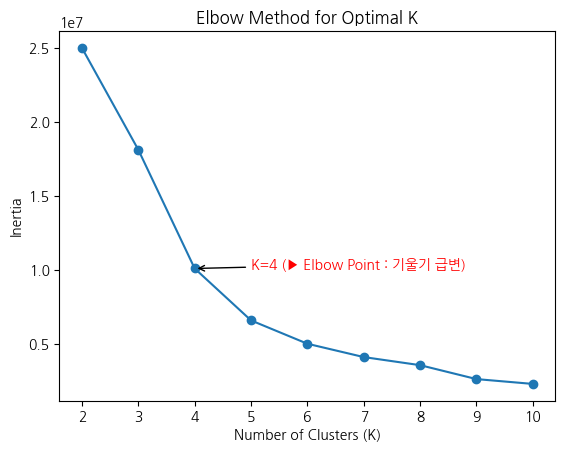

In [239]:
# 최적의 K값 찾기 (엘보우 방법)
inertia = []
k_range = range(2, 11)  # K=2~10 시도
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# 엘보우 그래프
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')

# K=4에 화살표 추가
k_optimal = 4
plt.annotate(
    'K=4 (▶ Elbow Point : 기울기 급변)',
    xy=(k_optimal, inertia[k_optimal - 2]),  # 화살표가 가리킬 위치
    xytext=(k_optimal + 1, inertia[k_optimal - 2] + 100),  # 텍스트 위치
    arrowprops=dict(facecolor='red', arrowstyle='->'),  # 화살표 스타일
    fontsize=10,
    color='red'
)

plt.show();

In [143]:
# 【 학습 】
# K-Means 클러스터링 수행 (K=4 설정)
X = rf_df[['Frequency', 'Recency']]
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rf_df['cluster'] = kmeans.fit_predict(X)

In [268]:
rf_df.head()

,user_id,Recency,Frequency,cluster,is_vip
0,1,0.0,11,0,0
1,2,3.0,15,0,0
2,3,7.0,13,0,0
3,4,0.0,6,0,0
4,5,6.0,5,0,0


In [144]:
# 클러스터별 평균값 확인
cluster_summary = rf_df.groupby('cluster').agg(
    avg_frequency=('Frequency', 'mean'),
    avg_recency=('Recency', 'mean'),
    count=('cluster', 'count')
).reset_index()
cluster_summary



,cluster,avg_frequency,avg_recency,count
0,0,9.963832,4.397952,118253
1,1,70.965055,0.386692,9558
2,2,31.803138,1.574490,36589
3,3,5.469250,20.125686,26423


In [222]:
# VIP 고객 군집 선정:
# - 가장 높은 Frequency & 낮은 Recency (재구매율 높은 고객)
vip_cluster = cluster_summary.sort_values(['avg_frequency', 'avg_recency'], ascending=[False, True]).iloc[0]['cluster']
rf_df['is_vip'] = (rf_df['cluster'] == vip_cluster).astype(int)
print(len(rf_df['is_vip']))

190823


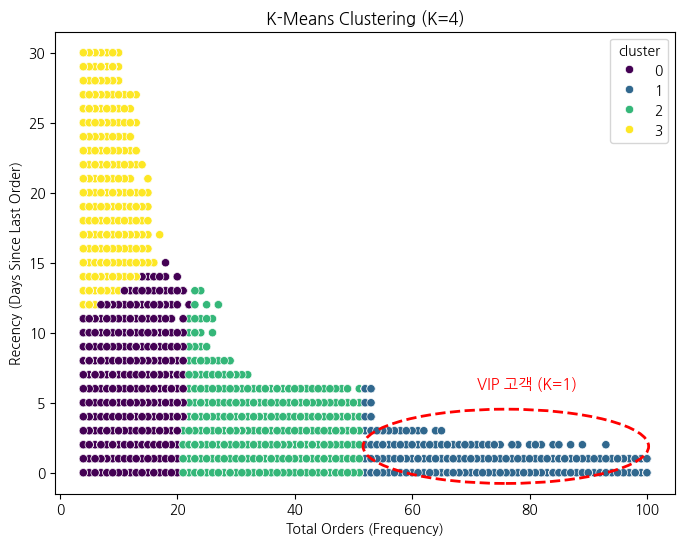

In [176]:
# 클러스터링 결과 시각화 (산점도)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse

plt.figure(figsize=(8, 6))
sns.scatterplot(x=rf_df['Frequency'], y=rf_df['Recency'], hue=rf_df['cluster'], palette='viridis')
plt.title('K-Means Clustering (K=4)')
plt.xlabel('Total Orders (Frequency)')
plt.ylabel('Recency (Days Since Last Order)')

# K=1 클러스터 타원 마킹
dx, dy = 5.0, 1.5
vip_cluster = rf_df[rf_df['cluster'] == 1]
ellipse = Ellipse(
    # 타원의 중심
    xy=(vip_cluster['Frequency'].mean()+dx, vip_cluster['Recency'].mean()+dy),
    width=vip_cluster['Frequency'].std() * 3,  # 타원의 너비 (표준편차 기준)
    height=vip_cluster['Recency'].std() * 8,  # 타원의 높이 (표준편차 기준)
    edgecolor='red',
    facecolor='none',
    linewidth=2,
    linestyle='--'
)
plt.gca().add_patch(ellipse)

# 타원 경계선에 화살표와 텍스트 추가
plt.annotate(
    "VIP 고객 (K=1)",
    xy=(vip_cluster['Frequency'].mean() + vip_cluster['Frequency'].std() * 1.5,
        vip_cluster['Recency'].mean() + vip_cluster['Recency'].std() * 1.5),  # 화살표가 가리킬 위치
    xytext=(71, 6),  # 텍스트 위치 (적절히 조정 가능)
    #arrowprops=dict(facecolor='red', arrowstyle='->'), # 화살표 스타일
    fontsize=11,
    color='red'
)

plt.show();

In [190]:
sum_user = len(rf_df)

print(sum_user)
rf_df.head()

190823


,user_id,Recency,Frequency,cluster,is_vip
0,1,0.0,11,0,0
1,2,3.0,15,0,0
2,3,7.0,13,0,0
3,4,0.0,6,0,0
4,5,6.0,5,0,0


## &nbsp; **◆ &nbsp;카이제곱 검정: (RF-검정)**<br>
- 카이제곱 검정은 범주형 변수(예: 특정 속성의 빈도)에 대해 군집 간의 차이를 검정.

In [ ]:
from scipy.stats import chi2_contingency
contingency_table = rf_df[['cluster', 'Recency', 'Frequency']]

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2:.2f}, P-value: {p:.4f}")

# 결과 해석
if p < 0.05:
    print("범주형 변수에서 군집 간 차이가 통계적으로 유의미합니다.")
else:
    print("범주형 변수에서 군집 간 차이가 통계적으로 유의미하지 않습니다.")

Chi-square statistic: 2046554.69, P-value: 0.0000
범주형 변수에서 군집 간 차이가 통계적으로 유의미합니다.


In [182]:
# -------------
# 【 vip_no 】
# -------------
# VIP 인원수 확인 ⇨ (# 9,558)
vip = rf_df[rf_df['is_vip']==1]
vip_no = len(vip)

vip_no   # 9,558

9558

In [187]:
non_vip = rf_df[rf_df['is_vip']!=1]
non_vip_no = len(non_vip)

non_vip_no   # 181,265

181265

In [196]:
vip_no + non_vip_no

190823

In [203]:
# -------------
# 【 user_no 】
# -------------
# user(고객수) 확인 ⇨ (# 3,164,696)
user_order = ord[['user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']]
### user_order['sun_monday'] = user_order[user_order['order_dow']==0 or user_order['order_dow']==1]###

import numpy as np
user_order['sun_monday'] = np.where((user_order['order_dow'] == 0) | (user_order['order_dow'] == 1), 1, 0)

user_no = len(user_order)
print(user_no)

user_order.head(10)

3164696


,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,sun_monday
0,1,1,2,8,-1.0,0
1,1,2,3,7,15.0,0
2,1,3,3,12,21.0,0
3,1,4,4,7,29.0,0
4,1,5,4,15,28.0,0
5,1,6,2,7,19.0,0
6,1,7,1,9,20.0,1
7,1,8,1,14,14.0,1
8,1,9,1,16,0.0,1
9,1,10,4,8,30.0,0


In [212]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_order
0,2539329,1,prior,1,2,8,-1.0,1
1,2398795,1,prior,2,3,7,15.0,0
2,473747,1,prior,3,3,12,21.0,0
3,2254736,1,prior,4,4,7,29.0,0
4,431534,1,prior,5,4,15,28.0,0


In [207]:
# user_id 별로 Group By 수행
grouped_data = user_order.groupby('user_id').agg({
    'sun_monday': 'sum',  # [일, 월요일]의 합계 계산
    'order_number': 'max'
}).reset_index()

# 결과 출력
grouped_data


,user_id,sun_monday,order_number
0,1,3,11
1,2,6,15
2,3,8,13
3,4,0,6
4,5,3,5
...,...,...,...
190818,190819,1,6
190819,190820,5,23
190820,190821,6,12
190821,190822,1,5


In [208]:
# is_vip 열 추가
grouped_data = pd.merge(rf_df, grouped_data, on='user_id')

# 결과 출력
grouped_data

,user_id,Recency,Frequency,cluster,is_vip,sun_monday,order_number
0,1,0.0,11,0,0,3,11
1,2,3.0,15,0,0,6,15
2,3,7.0,13,0,0,8,13
3,4,0.0,6,0,0,0,6
4,5,6.0,5,0,0,3,5
...,...,...,...,...,...,...,...
190818,190819,7.0,6,0,0,1,6
190819,190820,2.0,23,2,0,5,23
190820,190821,2.0,12,0,0,6,12
190821,190822,11.0,5,0,0,1,5


---
## VIP 분류
- vip_no  : &nbsp; # 9,558 &nbsp; /&nbsp; # 190,823 &nbsp; &nbsp; (5.0%)
---

In [262]:
vip = grouped_data[grouped_data['is_vip']==1]
total = 190823
no_vip = len(vip)

ratio = no_non_vip/total
print(f'{no_non_vip:,}, ({round(ratio,1)}%)' )
vip.head()

181,265, (0.9%)


,user_id,Recency,Frequency,cluster,is_vip,sun_monday,order_number
26,27,0.0,82,1,1,17,82
49,50,1.0,68,1,1,20,68
53,54,0.0,78,1,1,20,78
89,90,1.0,72,1,1,6,72
139,140,0.0,77,1,1,20,77


In [250]:
# VIP(1)
vip_R_max = vip['Recency'].max()
vip_R_mean = vip['Recency'].mean()

vip_R_max, vip_R_mean  # (6.0, 0.386691776522285)


(6.0, 0.386691776522285)

In [251]:
# VIP(2)
vip_F_min = vip['Frequency'].min()
vip_F_max = vip['Frequency'].max()
vip_F_mean = vip['Frequency'].mean()

vip_F_min, vip_F_max, vip_F_mean  # (52, 100, 70.96505545093116)


(52, 100, 70.96505545093116)

In [256]:
# VIP(3)
vip_ord  = vip['order_number'].mean()
vip_s_m  = vip['sun_monday'].mean()

vip_ord, vip_s_m   # (70.96505545093116, 22.58579200669596)


(70.96505545093116, 22.58579200669596)

In [258]:
# VIP(4)
vip_res = vip_s_m / vip_ord
print(f'◆ VIP : {round(vip_res*100,1)}%')

◆ VIP : 31.8%


In [263]:
# VIP(5) : 인당/일당 주문건수 비교 (일-월 / 평일)

round(vip_s_m / 2,1), round(vip_ord / 5,1)


(11.3, 14.2)

---
## Non VIP 분류
- Non vip_no  : &nbsp; # 181,265 &nbsp; /&nbsp; # 190,823 &nbsp; &nbsp; (95.0%)
---

In [229]:
non_vip = grouped_data[grouped_data['is_vip']==0]
total = 190823
no_non_vip = len(non_vip)

ratio = no_non_vip/total*100
print(f'{no_non_vip:,}, ({round(ratio,1)}%)' )
non_vip.head()

181,265, (95.0%)


,user_id,Recency,Frequency,cluster,is_vip,sun_monday,order_number
0,1,0.0,11,0,0,3,11
1,2,3.0,15,0,0,6,15
2,3,7.0,13,0,0,8,13
3,4,0.0,6,0,0,0,6
4,5,6.0,5,0,0,3,5


In [252]:
# Non VIP(1)

non_vip_R_max = non_vip['Recency'].max()
non_vip_R_mean = non_vip['Recency'].mean()

non_vip_R_max, non_vip_R_mean  # (30.0, 6.120657600750283)
# non_vip['Recency'].max(), non_vip['Recency'].mean()

(30.0, 6.120657600750283)

In [253]:
# Non VIP(2)

non_vip_F_min = non_vip['Frequency'].min()
non_vip_F_max = non_vip['Frequency'].max()
non_vip_F_mean = non_vip['Frequency'].mean()

non_vip_F_min, non_vip_F_max, non_vip_F_mean  # (4, 51, 13.716999972416076)
# non_vip['Frequency'].min(), non_vip['Frequency'].max(), non_vip['Frequency'].mean()

(4, 51, 13.716999972416076)

In [259]:
# Non VIP(3)
non_vip_ord  = non_vip['order_number'].mean()
non_vip_s_m  = non_vip['sun_monday'].mean()

non_vip_ord, non_vip_s_m   # (13.716999972416076, 4.871243759137175)
# non_vip['order_number'].mean(), non_vip['sun_monday'].mean()

(13.716999972416076, 4.871243759137175)

In [260]:
# Non VIP(4)
non_vip_res = non_vip_s_m / non_vip_ord
print(f'◆ Non VIP : {round(non_vip_res*100,1)}%')

◆ Non VIP : 35.5%
